<a href="https://colab.research.google.com/github/DhafinRA/Apriori/blob/main/Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import os

### PREPROCESS DATA

In [ ]:
#Raw Dataset
# df = pd.read_csv('https://raw.githubusercontent.com/DhafinRA/Apriori/refs/heads/main/data/All%20Year/2021.csv')
file_path = r'data/ All Year/ 2022'
df = pd.read_csv(file_path)

# menampilkan 5 data teratas dari data frame
df.head()

,ServTransCode,ServTransDate,Items,Group,NameOfServ,Qty
0,SRV002301020001,1/2/2023,Federal Ultratec 20w-50 800 mL,OLI MESIN,PASANG BAN BELAKANG,1
1,SRV042301020002,1/2/2023,Baut Body Kasar Yamaha,BAUT,PASANG REFLEKTOR,4
2,SRV022301020009,1/2/2023,Maxxis TL 100/90-12 M922F,BAN TUBLES,GANTI BAN TUBLES MATIC BELAKAN,1
3,SRV042301020002,1/2/2023,Baut Stelan Lampu Yamaha,BAUT,PASANG KARET STEP,1
4,SRV012301020005,1/2/2023,Baut 10X8 5 CM,BAUT,PASANG NOKEN AS,1


In [48]:
# Menghilangkan spasi dalam data
df['Items'] = df['Items'].str.strip()

In [4]:
#Menampilkan Informasi Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69613 entries, 0 to 69612
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ServTransCode  69613 non-null  object
 1   ServTransDate  69613 non-null  object
 2   Items          69613 non-null  object
 3   Group          69613 non-null  object
 4   NameOfServ     69613 non-null  object
 5   Qty            69613 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 3.2+ MB


In [5]:
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
ServTransCode    0
ServTransDate    0
Items            0
Group            0
NameOfServ       0
Qty              0
dtype: int64


In [6]:
df.describe()

,Qty
count,69613.000000
mean,1.154655
std,0.619584
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,30.000000


In [7]:
#Mengubah Tipe Data Menjadi Datetime
df['ServTransDate'] = pd.to_datetime(df['ServTransDate'], dayfirst=True, errors='coerce')

#Menampilkan Informasi Dataframe kembali
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69613 entries, 0 to 69612
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ServTransCode  69613 non-null  object        
 1   ServTransDate  30711 non-null  datetime64[ns]
 2   Items          69613 non-null  object        
 3   Group          69613 non-null  object        
 4   NameOfServ     69613 non-null  object        
 5   Qty            69613 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 3.2+ MB


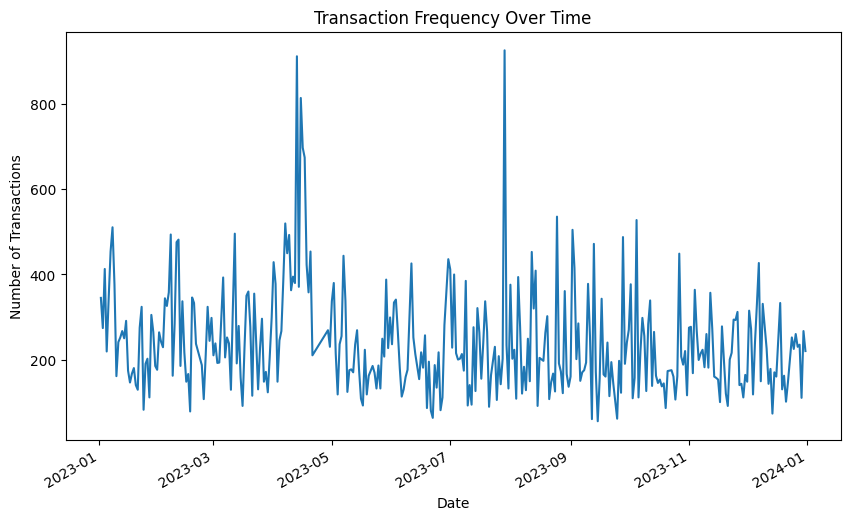

In [67]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan Distribusi Transaksi
plt.figure(figsize=(10, 6))
df['ServTransDate'] = pd.to_datetime(df['ServTransDate'])  # Convert to datetime
df['ServTransDate'].value_counts().sort_index().plot(kind='line')
plt.title('Transaction Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

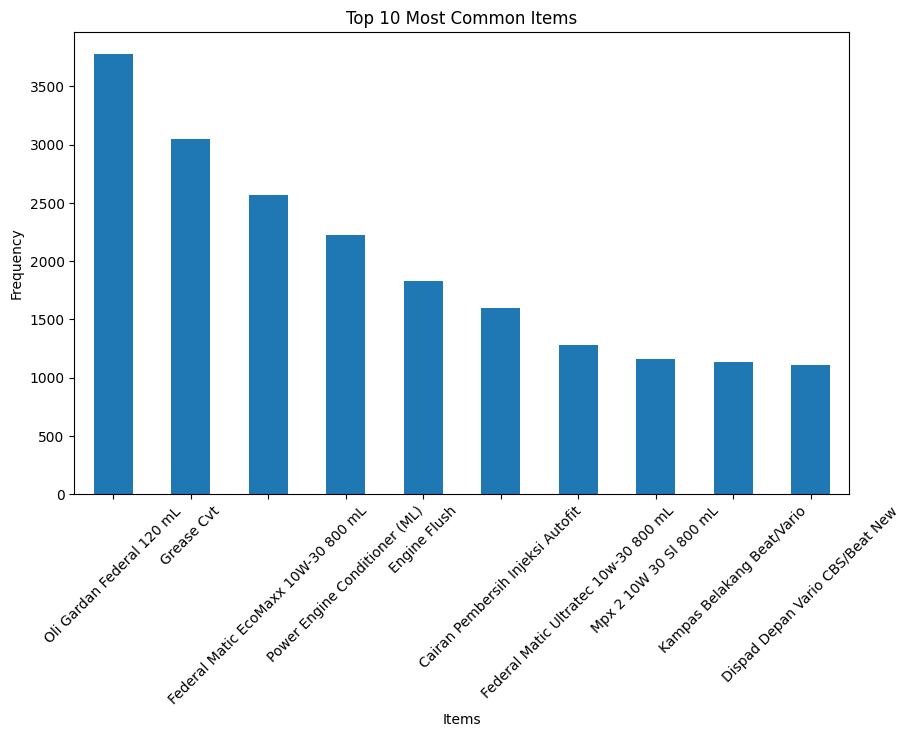

In [68]:
# Menampilkan distribusi barang penjualan
plt.figure(figsize=(10, 6))
df['Items'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Items')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### APRIORI DAN ASOSIASI

In [69]:
#Mengeblompokkan transaksi berdasarkan kolom ServTransCode untuk kolom Items
transaksi = df.groupby('ServTransCode')['Group'].apply(list)

#Mengubah data menjadi bentuk one-hot encoding
te = TransactionEncoder()
tf_encode = te.fit(transaksi).transform(transaksi)
tf_df = pd.DataFrame(tf_encode, columns= te.columns_)

tf_df.head()
#print(tf_df.head())


,Air Accu Isi 500 mL,Air Accu Zurr Isi 1L,Air Accu Zurr Isi 500 mL,Aki Aspira GM5Z-3B Basah,Aki Aspira GM5Z-3B Kering,Aki Aspira GTZ-5S,Aki Aspira GTZ-6V,Aki Aspira GTZ-7V,Aki Gs 12N9-4B1M Basah,Aki Gs GTZ-5S,...,Yamalube Gold 800 mL,Yamalube Matic 800 mL,Yamalube Silver 800 mL,Yamalube Sport 1000 mL,Yamalube Super Matic 1000 mL,Yamalube Super Sport 1000 mL,Zeneos TL 110/70-17 50P,Zeneos TL 120/70-13 58S,Zeneos TL 130/70-12 62P,tombol Sein Hazard Beat Fi
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
#Memasukkan Algoritma Apriori
frequent_itemsets = apriori(tf_df, min_support=0.01, use_colnames=True)

frequent_itemsets = frequent_itemsets.round(2)
frequent_itemsets

#menaruh hasil kedalam folder data
# folder_name = 'data/Hasil/2023'
# file_path = os.path.join(folder_name, 'hasil_apriori_2023_up_5.xlsx')
# frequent_itemsets.to_excel(file_path, index=False)

,support,itemsets
0,0.01,(Aki Gs GTZ-5S)
1,0.01,(Baut 10 Bordes)
2,0.02,(Baut Body Kasar Honda)
3,0.01,(Baut Body Kasar Yamaha)
4,0.01,(Baut Oli 17x12)
...,...,...
97,0.02,"(Engine Flush, Power Engine Conditioner (ML), ..."
98,0.02,"(Engine Flush, Oli Gardan Federal 120 mL, Powe..."
99,0.01,"(Cairan Pembersih Injeksi Autofit, Oli Gardan ..."
100,0.01,"(Engine Flush, Oli Gardan Federal 120 mL, Powe..."


In [78]:
# memasukkan Association Rules dengan menggunakan K1 1-itemset
ass_rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1, num_itemsets=1)
#Filtering kolom penting
ass_rules_col = ass_rules[['antecedents', 'consequents', 'support', 'confidence','lift' ]].round(2)
ass_rules_col 

# Antecedents
# Item atau kelompok item yang menjadi kondisi awal dalam aturan asosiasi. 
# Misalnya, (Oli Mesin Matic) menunjukkan bahwa aturan dimulai dari pembelian "Oli Mesin Matic".

# Consequents
# Item atau kelompok item yang menjadi hasil dari aturan asosiasi. 
# Misalnya, (Baut) berarti "Baut" cenderung dibeli setelah "Oli Mesin Matic".

# Support
# Proporsi transaksi yang mengandung antecedents dan consequents secara bersamaan. 
# Misalnya, 0.083333 menunjukkan bahwa 8,33% transaksi mengandung "Oli Mesin Matic" dan "Baut".

# Confidence
# Probabilitas bahwa consequents terjadi jika antecedents terjadi. 
# Misalnya, 0.125000 menunjukkan bahwa jika "Oli Mesin Matic" dibeli, ada 12,5% kemungkinan "Baut" juga dibeli.

# Lift
# Rasio pengaruh aturan dibandingkan dengan kejadian independen. Lift > 1 menunjukkan hubungan positif antara antecedents dan consequents. 
# Misalnya, 1.500000 menunjukkan bahwa pembelian "Baut" lebih mungkin terjadi jika "Oli Mesin Matic" dibeli.

folder_name = 'data/Hasil/2023'
file_path = os.path.join(folder_name, 'hasil_asosiasi_2023.xlsx')
ass_rules_col.to_excel(file_path, index=False)



In [79]:
#Sorting berdasarkan Lift
ass_sort= ass_rules_col.sort_values(by = 'lift', ascending = False)
ass_sort.head()

folder_name = 'data/Hasil/2023'
file_path = os.path.join(folder_name, 'sorted_asosiasi_2023.xlsx')
ass_sort.to_excel(file_path, index=False)

### VISUALISASI HASIL

<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
C:\Users\Ameli\AppData\Local\Temp\ipykernel_25308\3632802583.py:2: DeprecationWarning: invalid escape sequence \d
  datanya = '\data\Hasil\sorted_asosiasi_cleaned.csv'


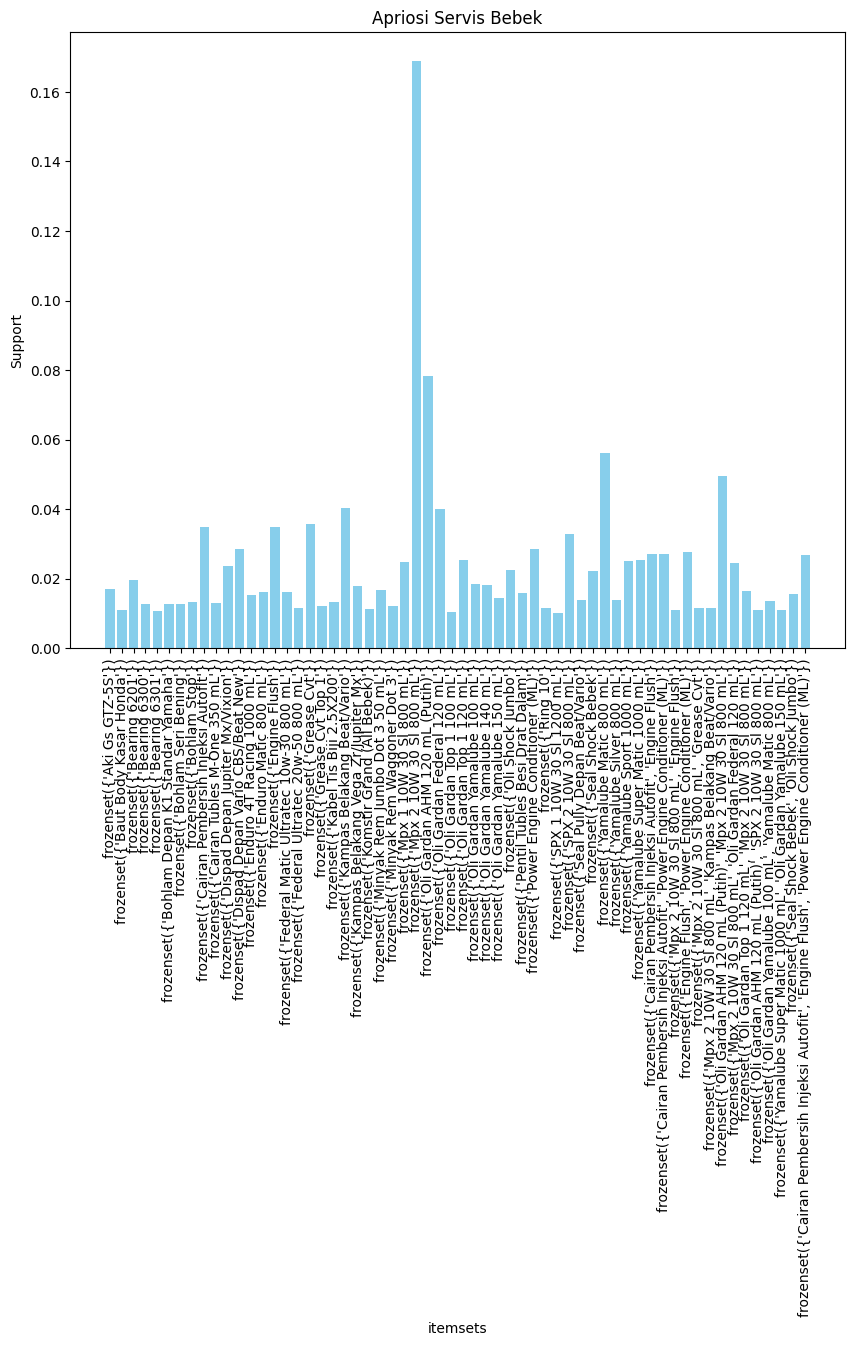

In [15]:
#Visualisasi Bar chart
datanya = '\data\Hasil\sorted_asosiasi_cleaned.csv'
plt.figure(figsize=(10,8))
plt.bar(frequent_itemsets['itemsets'].astype(str), frequent_itemsets['support'], color='skyblue')
plt.xlabel('itemsets')
plt.ylabel('Support')
plt.xticks(rotation=90)
plt.title('Apriosi Servis Bebek')
plt.show()